In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string   
import os
import codecs

stopger = stopwords.words('german')

In [2]:
f = codecs.open("data/neujahr.txt", "r", "utf-8")
new = f.read()

In [3]:
print(new)

15.1.2014

Rückblick auf 2013 aus der Sicht des AL

•	Aufregendes und z.T. turbulentes Jahr 
•	vor allem aber ein Jahr des Wandels, der Profilbildung und des Erfolgs

1.	Zum Wandel - Personalveränderungen:
•	Personalabgang: 
o	F Blanck, H Andräs, F Germer, F Eimer, H Kerlé, F Schöning-Walter (-6)

•	Personalzuwachs:
o	F Baumgartner, F Buchmann, F Hofrichter, H Kaufmann, H Körner, F Ludewig, H Neuendorf, H Perina, H Schlüter (+9)

	also leicht gewachsen: heute 25 MA

	insgesamt erfreuliche Entwicklung, 

	auch wenn man keinen der abgegangenen Mitarbeiter missen möchte und gerne noch weitergearbeitet hätte.

2.  Zur Profilbildung – Veränderungen der Organisation und der Aufgaben
	
- Referatestruktur wurde eingeführt

- Stabsstelle Automatische Erschließung wurde aufgelöst

- WPD: 
•	MAB-Dienst wurde abgelöst 

•	ebenso der Titelkartendienst

•	hinzu kam die Pflege der MARC-Dokumentation 
	
- Content: 
•	E-Paper-Projektleitung wurde an F1 übergeben  keine sammlungsbezogenen Aufgaben m

In [4]:
words = new.split()
print(words)

['15.1.2014', 'Rückblick', 'auf', '2013', 'aus', 'der', 'Sicht', 'des', 'AL', '•', 'Aufregendes', 'und', 'z.T.', 'turbulentes', 'Jahr', '•', 'vor', 'allem', 'aber', 'ein', 'Jahr', 'des', 'Wandels,', 'der', 'Profilbildung', 'und', 'des', 'Erfolgs', '1.', 'Zum', 'Wandel', '-', 'Personalveränderungen:', '•', 'Personalabgang:', 'o', 'F', 'Blanck,', 'H', 'Andräs,', 'F', 'Germer,', 'F', 'Eimer,', 'H', 'Kerlé,', 'F', 'Schöning-Walter', '(-6)', '•', 'Personalzuwachs:', 'o', 'F', 'Baumgartner,', 'F', 'Buchmann,', 'F', 'Hofrichter,', 'H', 'Kaufmann,', 'H', 'Körner,', 'F', 'Ludewig,', 'H', 'Neuendorf,', 'H', 'Perina,', 'H', 'Schlüter', '(+9)', '\uf0e8', 'also', 'leicht', 'gewachsen:', 'heute', '25', 'MA', '\uf0e8', 'insgesamt', 'erfreuliche', 'Entwicklung,', '\uf0e8', 'auch', 'wenn', 'man', 'keinen', 'der', 'abgegangenen', 'Mitarbeiter', 'missen', 'möchte', 'und', 'gerne', 'noch', 'weitergearbeitet', 'hätte.', '2.', 'Zur', 'Profilbildung', '–', 'Veränderungen', 'der', 'Organisation', 'und', 'der'

In [5]:
listofwords = []

for item in words:
    item = item.lower()
    listofwords.append(item)

In [6]:
print(listofwords)

['15.1.2014', 'rückblick', 'auf', '2013', 'aus', 'der', 'sicht', 'des', 'al', '•', 'aufregendes', 'und', 'z.t.', 'turbulentes', 'jahr', '•', 'vor', 'allem', 'aber', 'ein', 'jahr', 'des', 'wandels,', 'der', 'profilbildung', 'und', 'des', 'erfolgs', '1.', 'zum', 'wandel', '-', 'personalveränderungen:', '•', 'personalabgang:', 'o', 'f', 'blanck,', 'h', 'andräs,', 'f', 'germer,', 'f', 'eimer,', 'h', 'kerlé,', 'f', 'schöning-walter', '(-6)', '•', 'personalzuwachs:', 'o', 'f', 'baumgartner,', 'f', 'buchmann,', 'f', 'hofrichter,', 'h', 'kaufmann,', 'h', 'körner,', 'f', 'ludewig,', 'h', 'neuendorf,', 'h', 'perina,', 'h', 'schlüter', '(+9)', '\uf0e8', 'also', 'leicht', 'gewachsen:', 'heute', '25', 'ma', '\uf0e8', 'insgesamt', 'erfreuliche', 'entwicklung,', '\uf0e8', 'auch', 'wenn', 'man', 'keinen', 'der', 'abgegangenen', 'mitarbeiter', 'missen', 'möchte', 'und', 'gerne', 'noch', 'weitergearbeitet', 'hätte.', '2.', 'zur', 'profilbildung', '–', 'veränderungen', 'der', 'organisation', 'und', 'der'

In [50]:
newStopwords = ['Der', 'Die', 'Das', 'I', 'II', 'III', 'i', 'ii', 'iii', '•', '–', '-', 'o', '', '-->', 'H']
stopger.extend(newStopwords)

tokens_lower = [word for word in listofwords if not word in stopger]
tokens_without_sw = [word for word in words if not word in stopger]
#print(tokens_without_sw)

counts = Counter(tokens_without_sw)
#print(counts)

final_top = pd.DataFrame.from_records(counts.most_common(200), columns=['Wort','Anzahl']) #sortiert nach Häufigkeit
final_all = pd.DataFrame.from_records(counts.most_common(), columns=['Wort','Anzahl']) #sortiert nach Häufigkeit

final_top

,Wort,Anzahl
0,Sie,43
1,Und,36
2,Jahr,34
3,ganz,18
4,Ihnen,18
...,...,...
195,weitere,2
196,Entwicklung,2
197,Bezug,2
198,feste,2


In [33]:
string = ""

for item in tokens_lower:
    string = string + " " + item
    
print(string)

 15.1.2014 rückblick 2013 sicht al aufregendes z.t. turbulentes jahr jahr wandels, profilbildung erfolgs 1. wandel personalveränderungen: personalabgang: f blanck, h andräs, f germer, f eimer, h kerlé, f schöning-walter (-6) personalzuwachs: f baumgartner, f buchmann, f hofrichter, h kaufmann, h körner, f ludewig, h neuendorf, h perina, h schlüter (+9) leicht gewachsen: heute 25 ma insgesamt erfreuliche entwicklung, abgegangenen mitarbeiter missen möchte gerne weitergearbeitet hätte. 2. profilbildung veränderungen organisation aufgaben referatestruktur wurde eingeführt stabsstelle automatische erschließung wurde aufgelöst wpd: mab-dienst wurde abgelöst ebenso titelkartendienst hinzu kam pflege marc-dokumentation content: e-paper-projektleitung wurde f1 übergeben  sammlungsbezogenen aufgaben mehr neu hinzu kam rechteklärung heute dnb klar, digitalisierung heute dominant 2d betrieben wird. folgen: abteilung zwei referaten weitgehend transparentes aufgabenprofil heute besser aufgestellt 

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
wordcloud = WordCloud(width=1000, height=500, margin=0).generate(string)

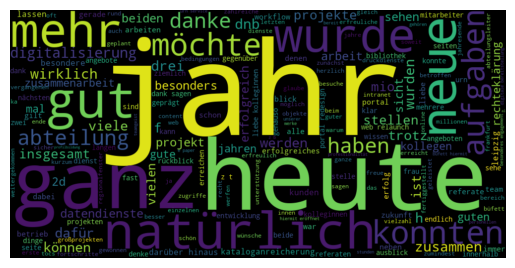

In [15]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [19]:
wordcloud2 = WordCloud(stopwords = stopger,
                      collocations=True).generate(string)


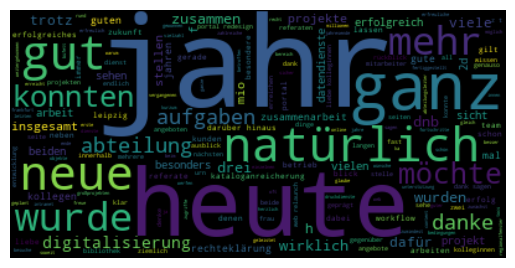

In [21]:
cloud2 = plt.imshow(wordcloud2, interpolation='bilInear')
cloud2 = plt.axis('off')
plt.show(cloud2)

In [51]:
tuples = [tuple(x) for x in final_top.values]

In [52]:
wordcloud3 = WordCloud(width=800, height=600,).generate_from_frequencies(dict(tuples))

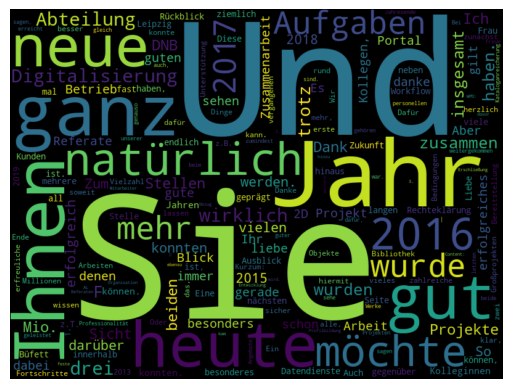

In [53]:
cloud3 = plt.imshow(wordcloud3, interpolation='bilInear')
cloud3 = plt.axis('off')
plt.show(cloud3)